In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import PowerTransformer
plt.style.use('ggplot')

In [2]:
df=pd.read_csv("E:/piere/Documentos/Portafolio/fraud/Data/processed/data_final.csv")

In [3]:
df=df.drop(["index"], axis=1)

In [4]:
column=list(set(list(df.columns))-set(list(["type", "nameOrig", "nameDest","isFraud"])))
X=df[column]
y=df["isFraud"]

In [5]:
y=tf.keras.utils.to_categorical(y, num_classes=2)

In [6]:
pt=PowerTransformer()
x_new=pt.fit_transform(X)

In [7]:
X_train=x_new[:9855]
y_train=y[:9855]
X_val=x_new[9855:13140]
y_val=y[9855:13140]
X_test=x_new[13140:]
y_test=y[13140:]

In [8]:
model=models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(.25))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['BinaryAccuracy'])



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 10,082
Trainable params: 10,082
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                   batch_size=100,
                   validation_data=(X_val,y_val))

Epoch 1/20
99/99 [==============================] - 3s 13ms/step - loss: 0.2397 - binary_accuracy: 0.9160 - val_loss: 0.1175 - val_binary_accuracy: 0.9597
Epoch 2/20
99/99 [==============================] - 1s 6ms/step - loss: 0.1006 - binary_accuracy: 0.9681 - val_loss: 0.0762 - val_binary_accuracy: 0.9784
Epoch 3/20
99/99 [==============================] - 1s 6ms/step - loss: 0.0785 - binary_accuracy: 0.9784 - val_loss: 0.0713 - val_binary_accuracy: 0.9863
Epoch 4/20
99/99 [==============================] - 1s 6ms/step - loss: 0.0716 - binary_accuracy: 0.9806 - val_loss: 0.0606 - val_binary_accuracy: 0.9795
Epoch 5/20
99/99 [==============================] - 1s 7ms/step - loss: 0.0667 - binary_accuracy: 0.9816 - val_loss: 0.0589 - val_binary_accuracy: 0.9855
Epoch 6/20
99/99 [==============================] - 1s 7ms/step - loss: 0.0616 - binary_accuracy: 0.9832 - val_loss: 0.0495 - val_binary_accuracy: 0.9858
Epoch 7/20
99/99 [==============================] - 1s 7ms/step - loss: 0.0

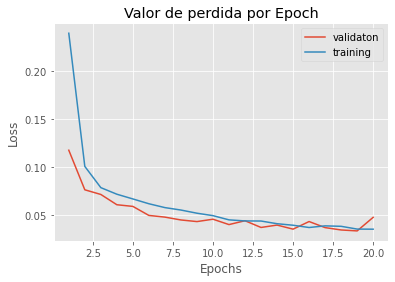

In [34]:
epoch=range(1,len(history.history["val_loss"])+1)
plt.plot(epoch,history.history["val_loss"], label="validaton")
plt.plot(epoch,history.history["loss"], label="training")
plt.legend()
plt.title("Valor de perdida por Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

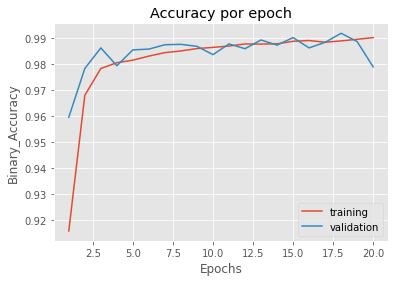

In [38]:
plt.plot(epoch, history.history["binary_accuracy"], label="training")
plt.plot(epoch, history.history["val_binary_accuracy"], label="validation")
plt.title("Accuracy por epoch")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Binary_Accuracy")
plt.show()

In [12]:
model.evaluate(X_test, y_test)

103/103 [==============================] - 0s 3ms/step - loss: 0.0507 - binary_accuracy: 0.9784


[0.050746265798807144, 0.9783931970596313]

In [13]:
y_predic=model.predict(X_test)

103/103 [==============================] - 0s 3ms/step


In [14]:
predic_ctagegoris=np.argmax(y_predic, axis=1)

In [15]:
predic_ctagegoris.shape

(3286,)

In [16]:
y_test_new=np.argmax(y_test,axis=1)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test_new, predic_ctagegoris))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1641
           1       0.99      0.96      0.98      1645

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286



In [40]:
g=confusion_matrix(y_test_new, predic_ctagegoris)

<AxesSubplot:>

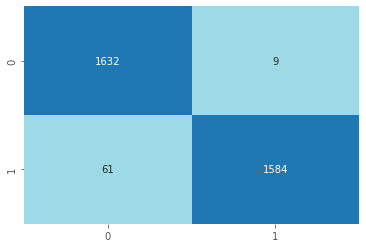

In [50]:
sns.heatmap(g, cbar=False, cmap='tab20_r', annot=True, fmt=".0f")

# Conclusión

* Hemos desarrollado una red neuronal, el cual ha logrado bajar mi incertidumbre que obtuve con el anterior modelo de decision tree. Cabe aclarar que le modelo fue under balanceado para poder manejar los datos en mi equipo de cómputo. La red neuronal es sencilla arrojando unas muy buenas métricas.
* Como recomendación, podemos alterar y colocar otros tipos de funciones de activación para observar como se comporta mis datos y las métricas resultantes.